# 300-hPa wind climatology spherical harmonic transforms

In [1]:
%config IPCompleter.greedy = True
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2
    
import warnings
warnings.filterwarnings("ignore")

import senpy as sp

import numpy  as np
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt

import xspharm

plt.style.use('science')

In [ ]:
# era_ds = sp.ERA5_onelevel_vars(vars=['u10', 'v10']).mean('time').load()
era_ds = sp.ERA5_pressuelevel_vars(vars=['u', 'v']).sel(lev=300).groupby('time.month').mean('time').load()
era_ds

In [13]:
Xsp = sp.xspharm(era_ds)
uv_tranc = Xsp.truncate(era_ds, ntrunc=24)
uv_taper = Xsp.exp_taper(era_ds, ntrunc=24)

<Figure size 1200x800 with 0 Axes>

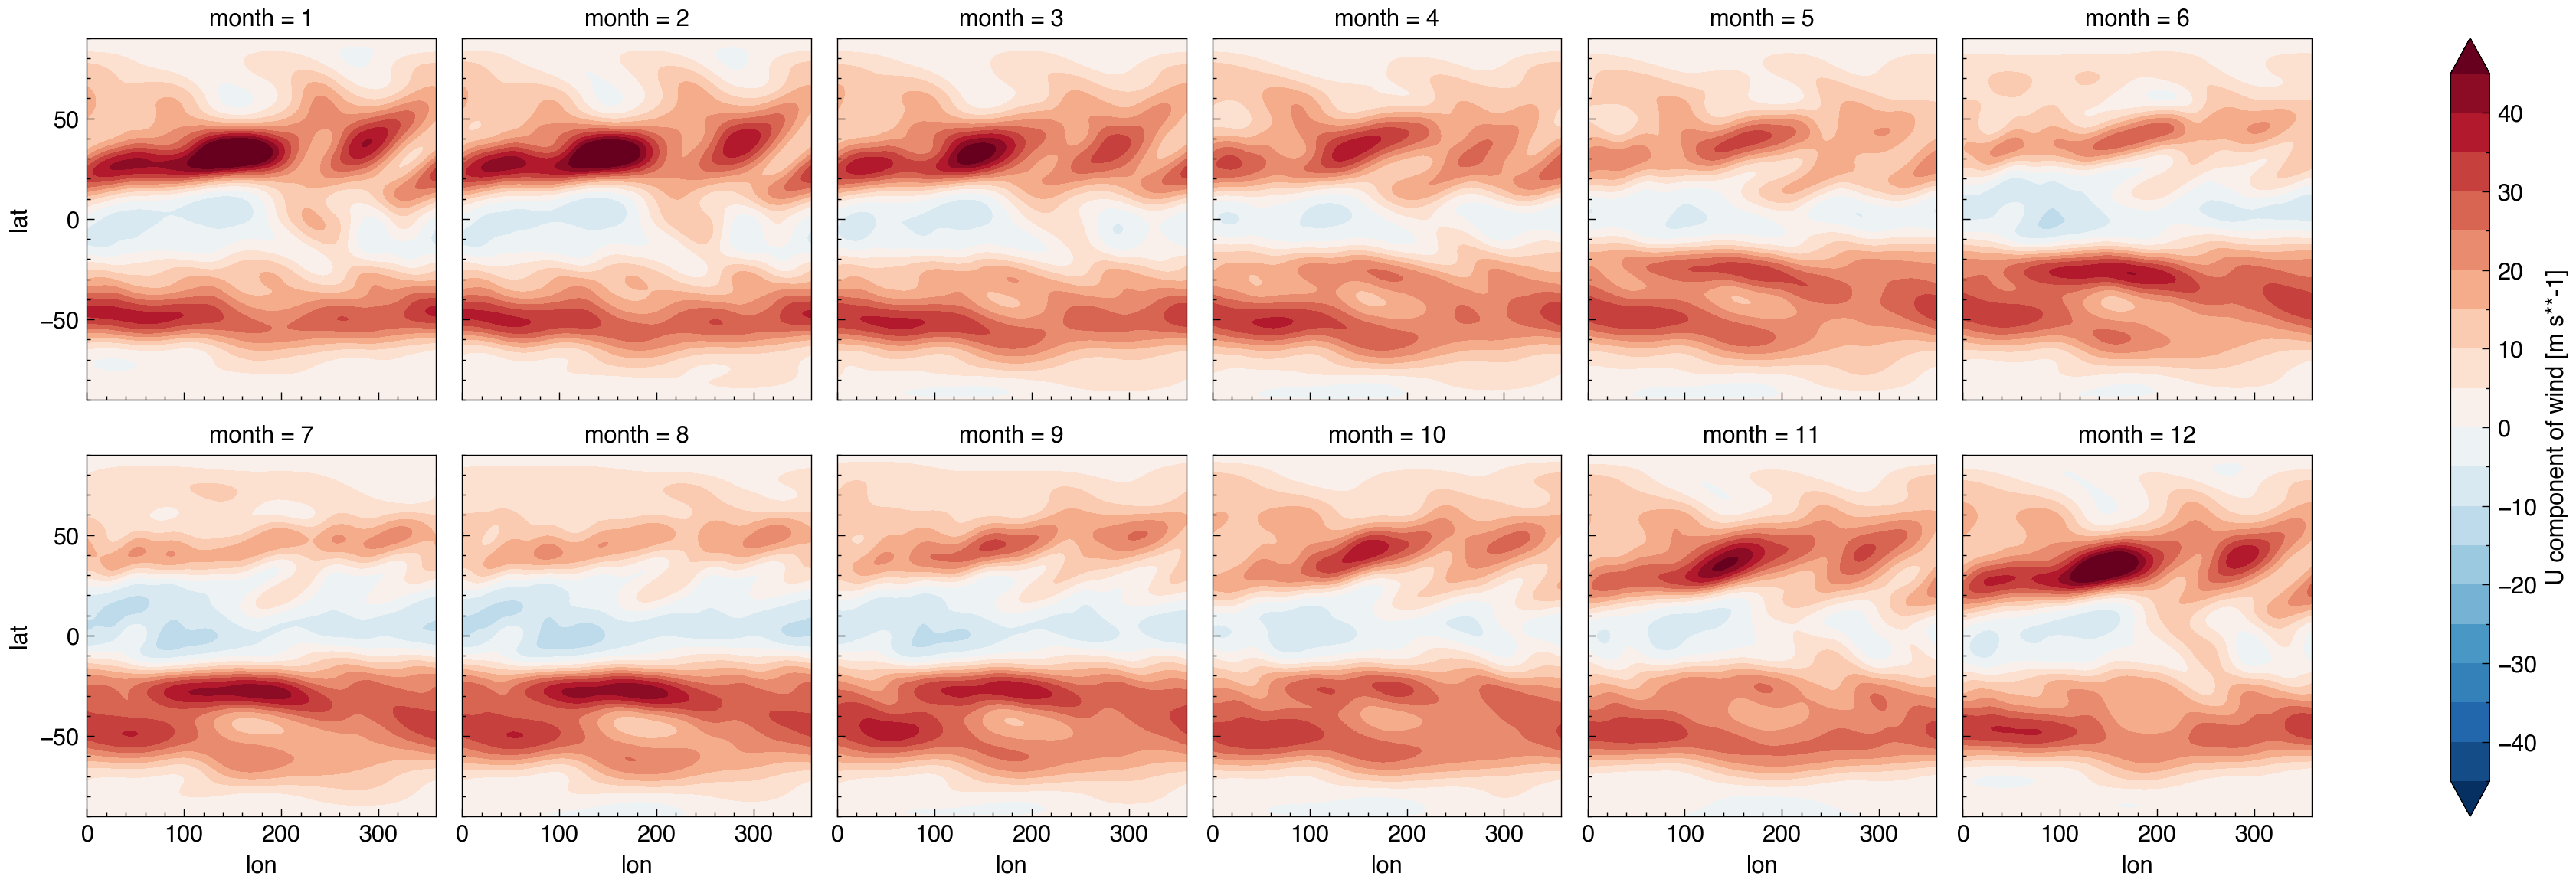

<Figure size 1200x800 with 0 Axes>

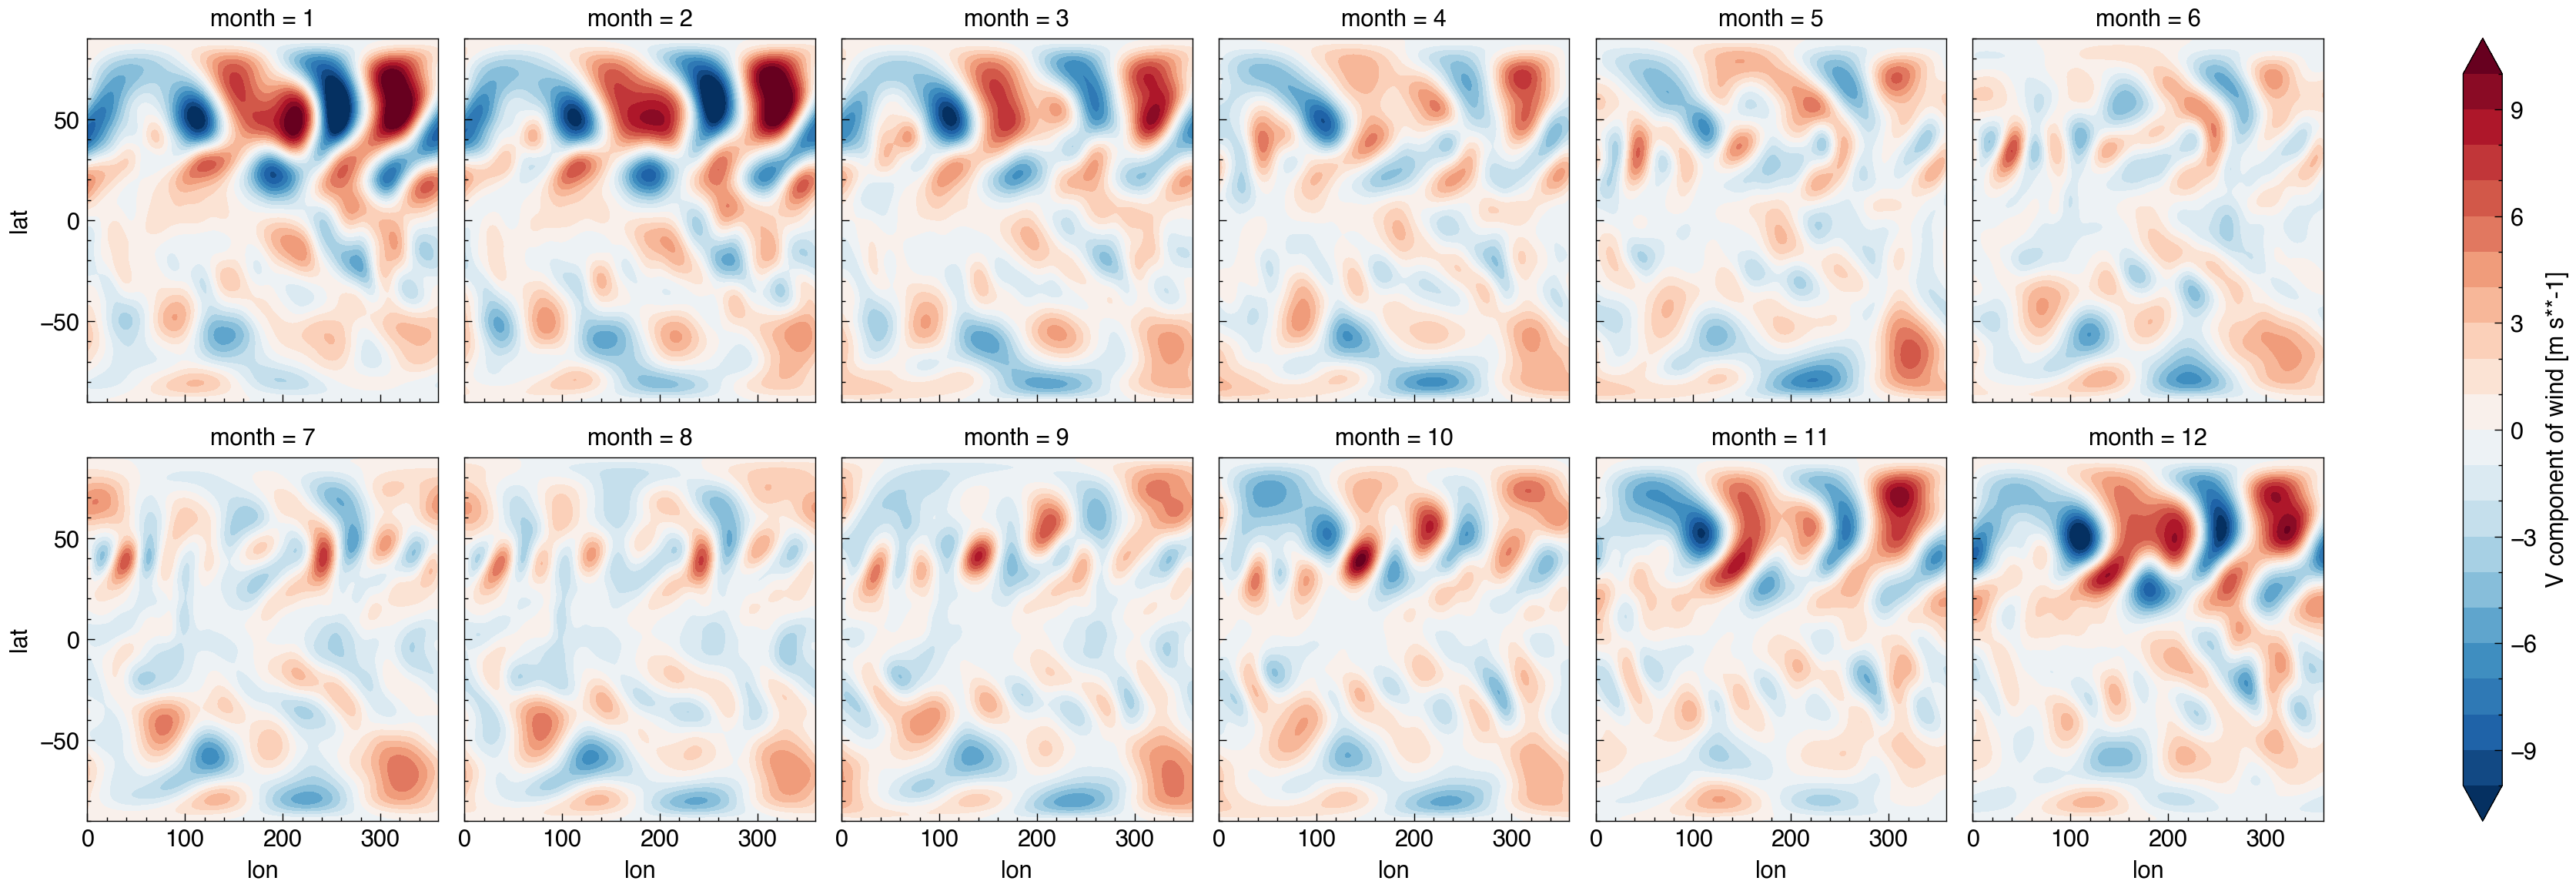

In [4]:

cdict_u = sp.cmap.dict_cmap_contourf(levels=np.arange(-45, 45.01, step=5), name='RdBu_r', extend='both', add_norm=False)
cdict_v = sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1), name='RdBu_r', extend='both', add_norm=False)

plt.figure(figsize=(12, 8))
uv_taper['u'].plot.contourf(col='month', col_wrap=6, **cdict_u)

plt.figure(figsize=(12, 8))
uv_taper['v'].plot.contourf(col='month', col_wrap=6, **cdict_v)

In [5]:
sfvp_ds = Xsp.uv2sfvp(era_ds.u, era_ds.v)
sfvp_ds

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181, month: 12)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    lev      int32 300
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sf       (month, lat, lon) float32 -1.193e+08 -1.193e+08 ... 1.267e+08
    vp       (month, lat, lon) float32 5.162e+05 5.162e+05 ... -9.082e+05

<Figure size 1200x800 with 0 Axes>

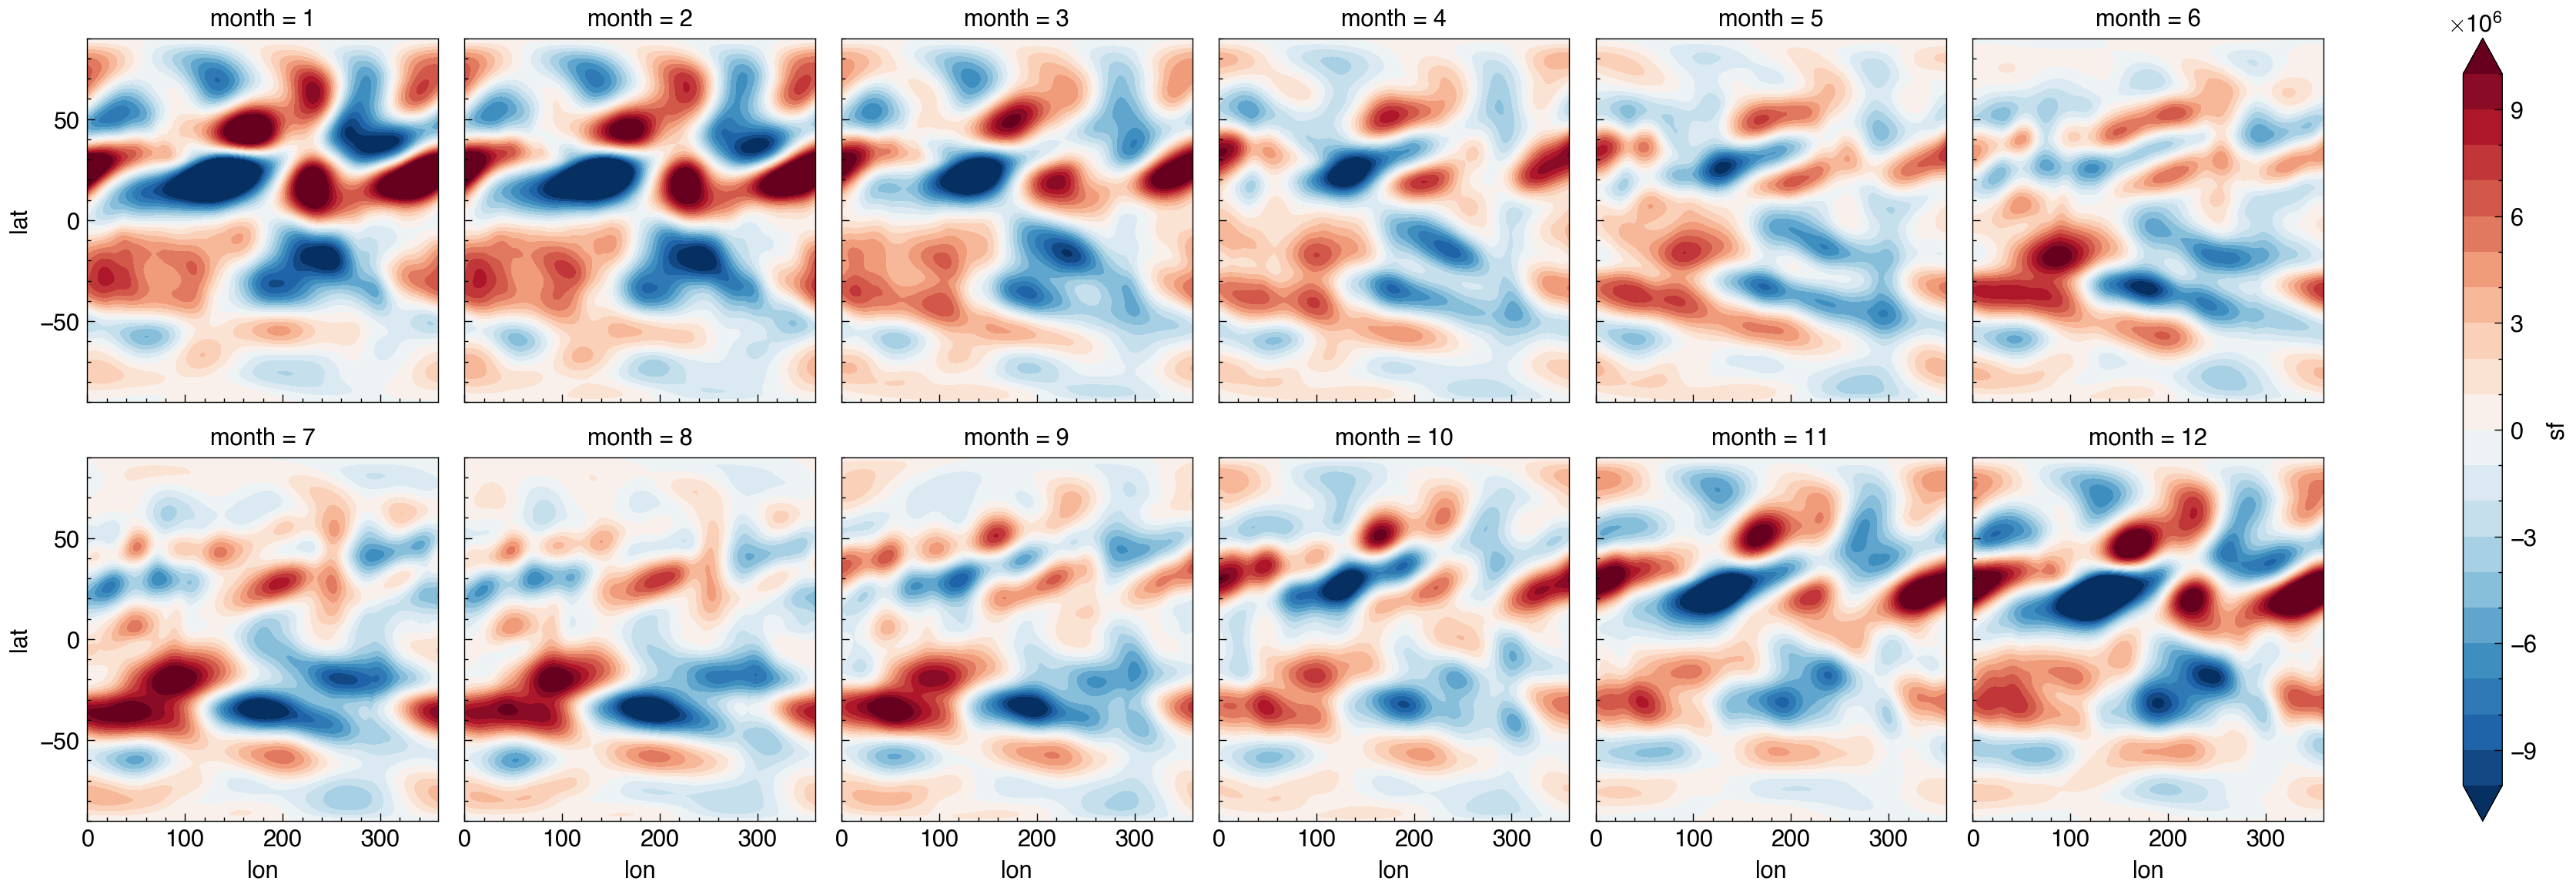

<Figure size 1200x800 with 0 Axes>

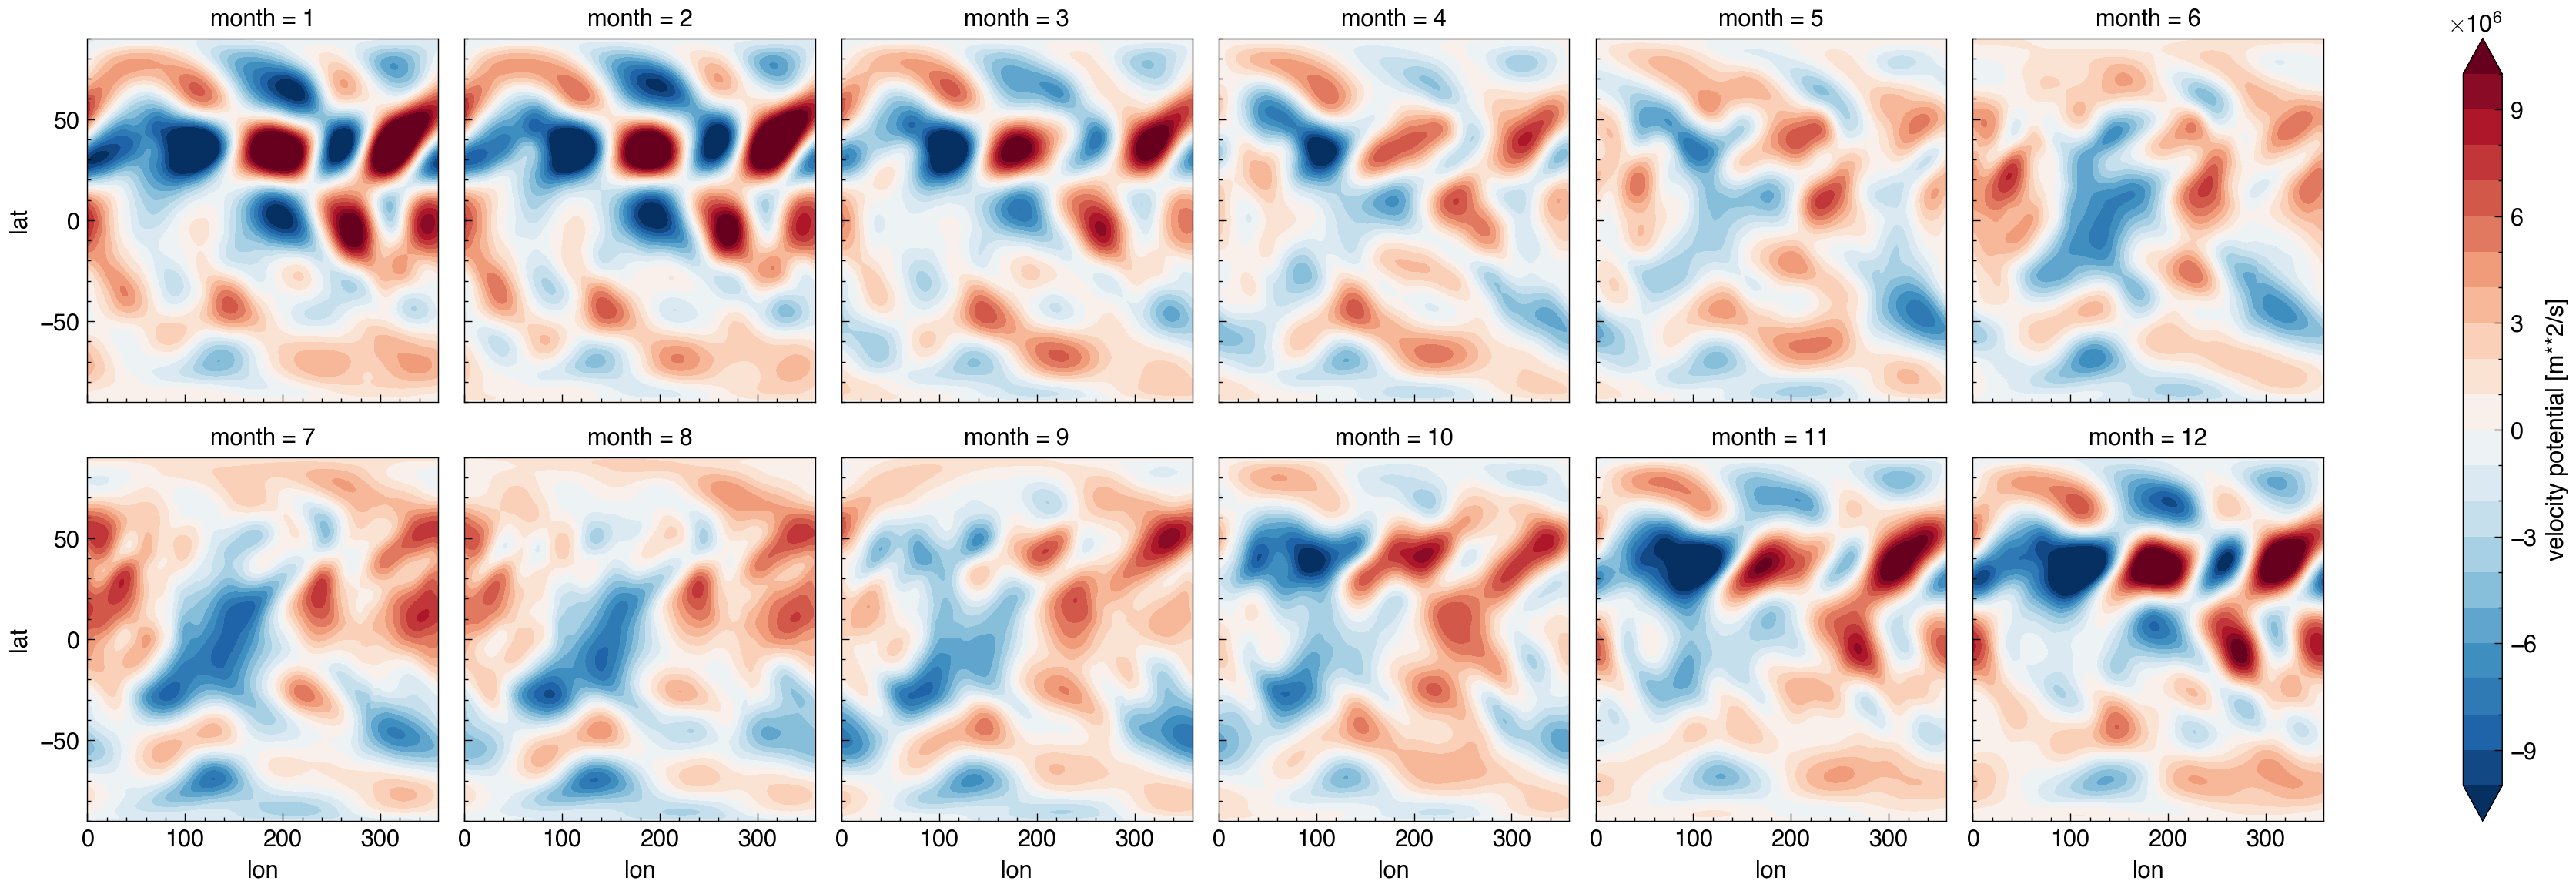

In [6]:
cdict_sf = sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*1e6, name='RdBu_r', extend='both', add_norm=False)
cdict_vp = sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*1e6, name='RdBu_r', extend='both', add_norm=False)

plt.figure(figsize=(12, 8))
(sfvp_ds['sf']-sfvp_ds['sf'].mean('lon')).plot.contourf(col='month', col_wrap=6, **cdict_sf)

plt.figure(figsize=(12, 8))
sfvp_ds['vp'].plot.contourf(col='month', col_wrap=6, **cdict_vp)


In [7]:
vordiv_ds = Xsp.uv2vordiv(era_ds.u, era_ds.v, ntrunc=24)
vordiv_ds


<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181, month: 12)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    lev      int32 300
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    vor      (month, lat, lon) float32 5.107e-06 5.107e-06 ... -3.351e-06
    div      (month, lat, lon) float32 2.686e-07 2.686e-07 ... -5.619e-08

<Figure size 1200x800 with 0 Axes>

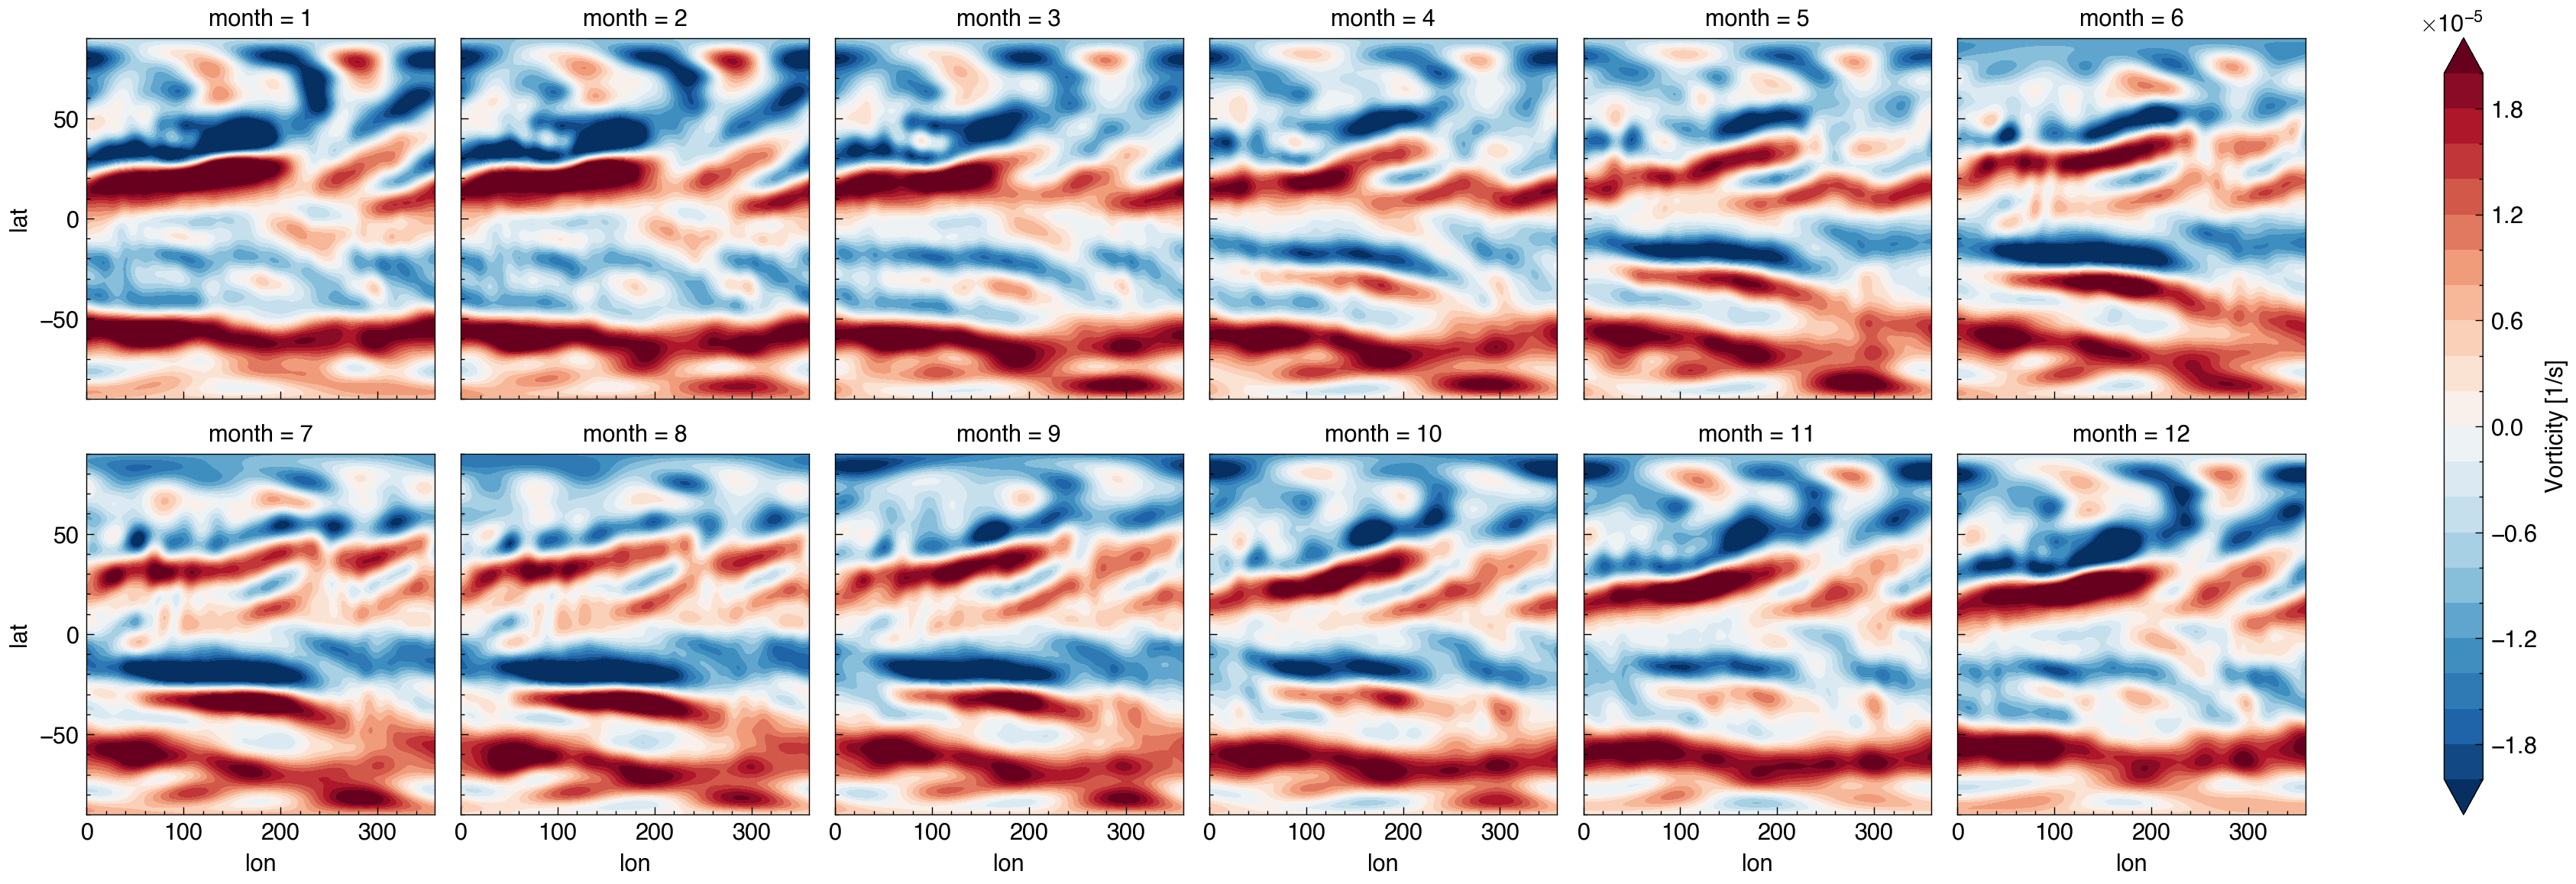

<Figure size 1200x800 with 0 Axes>

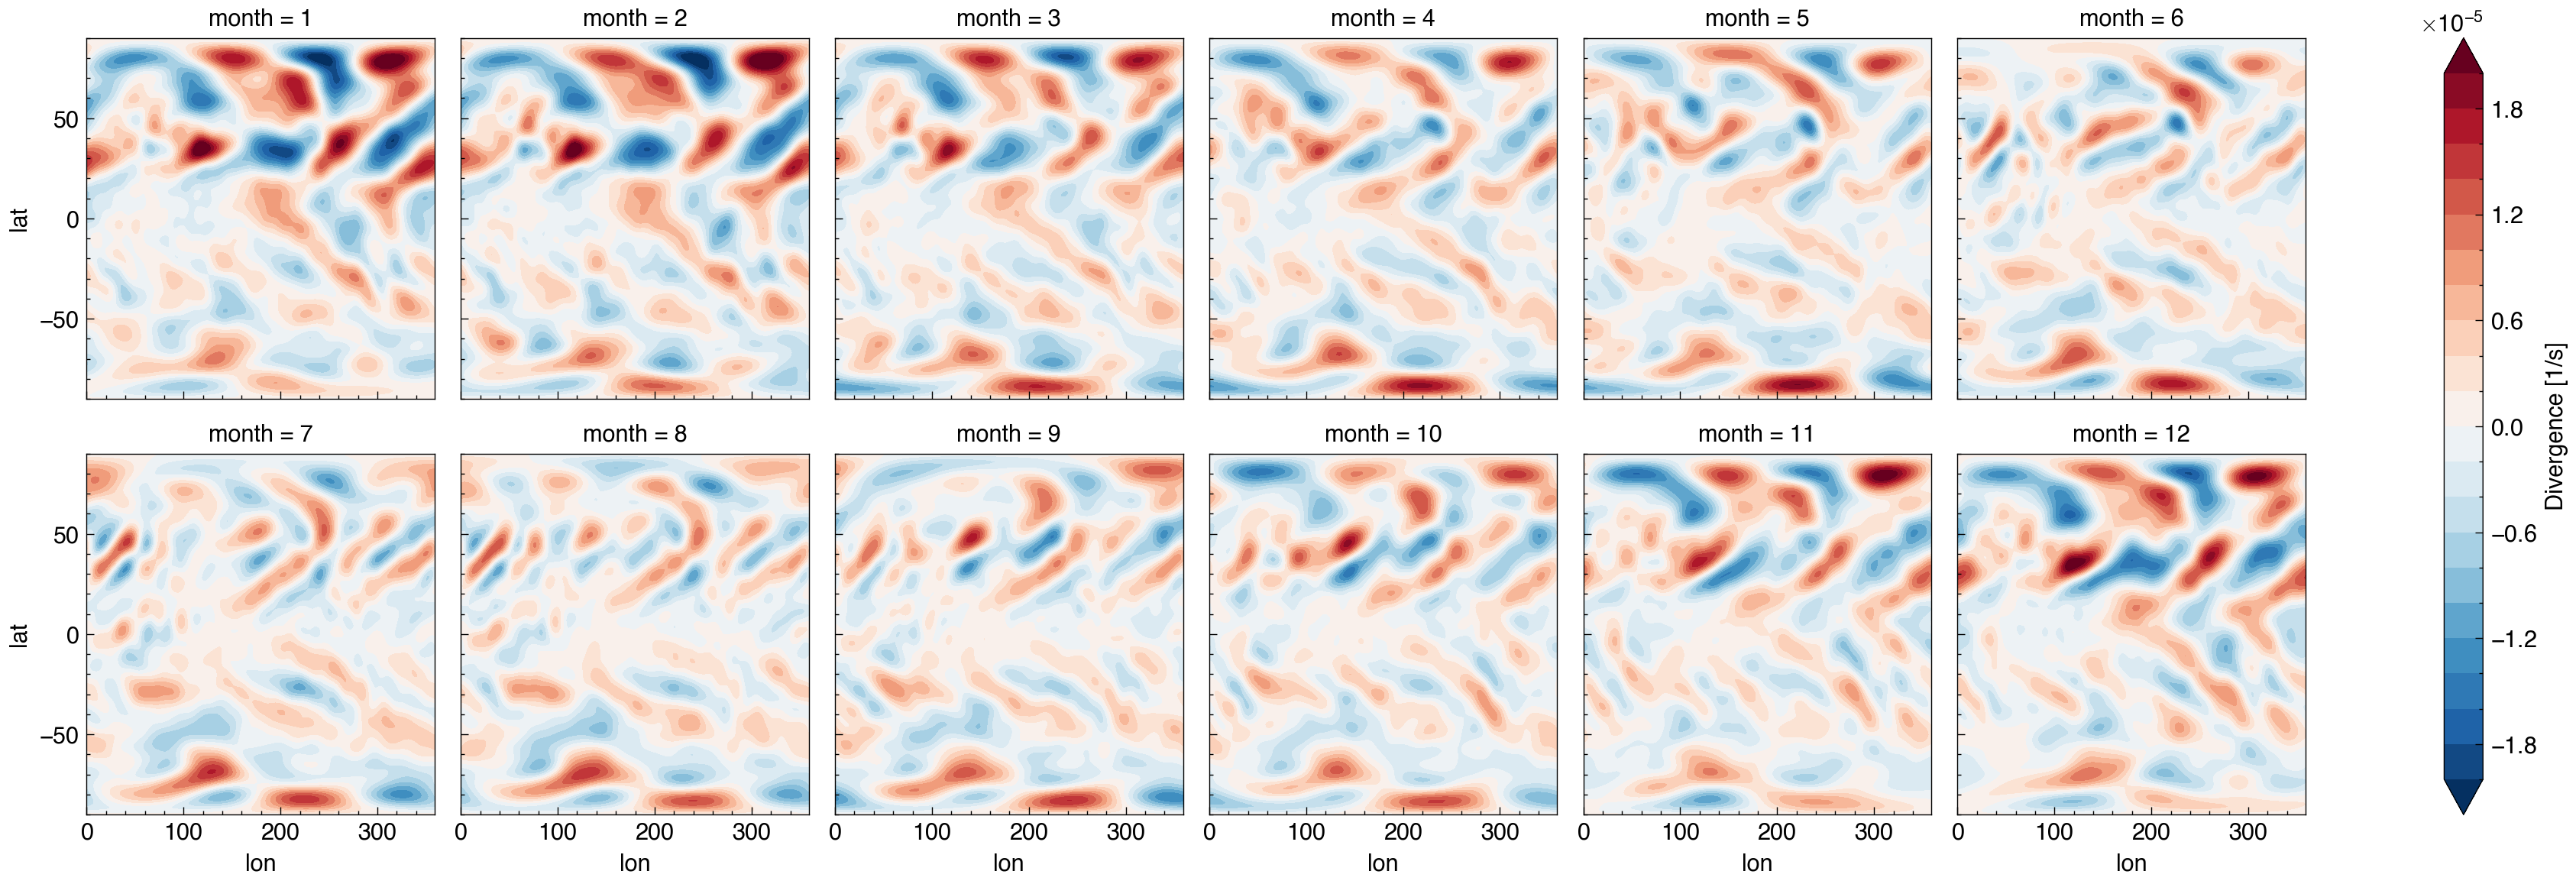

In [8]:
cdict_vor = sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*2e-6, name='RdBu_r', extend='both', add_norm=False)
cdict_div = sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*2e-6, name='RdBu_r', extend='both', add_norm=False)

plt.figure(figsize=(12, 8))
vordiv_ds['vor'].plot.contourf(col='month', col_wrap=6, **cdict_vor)

plt.figure(figsize=(12, 8))
vordiv_ds['div'].plot.contourf(col='month', col_wrap=6, **cdict_div)


<Figure size 1200x800 with 0 Axes>

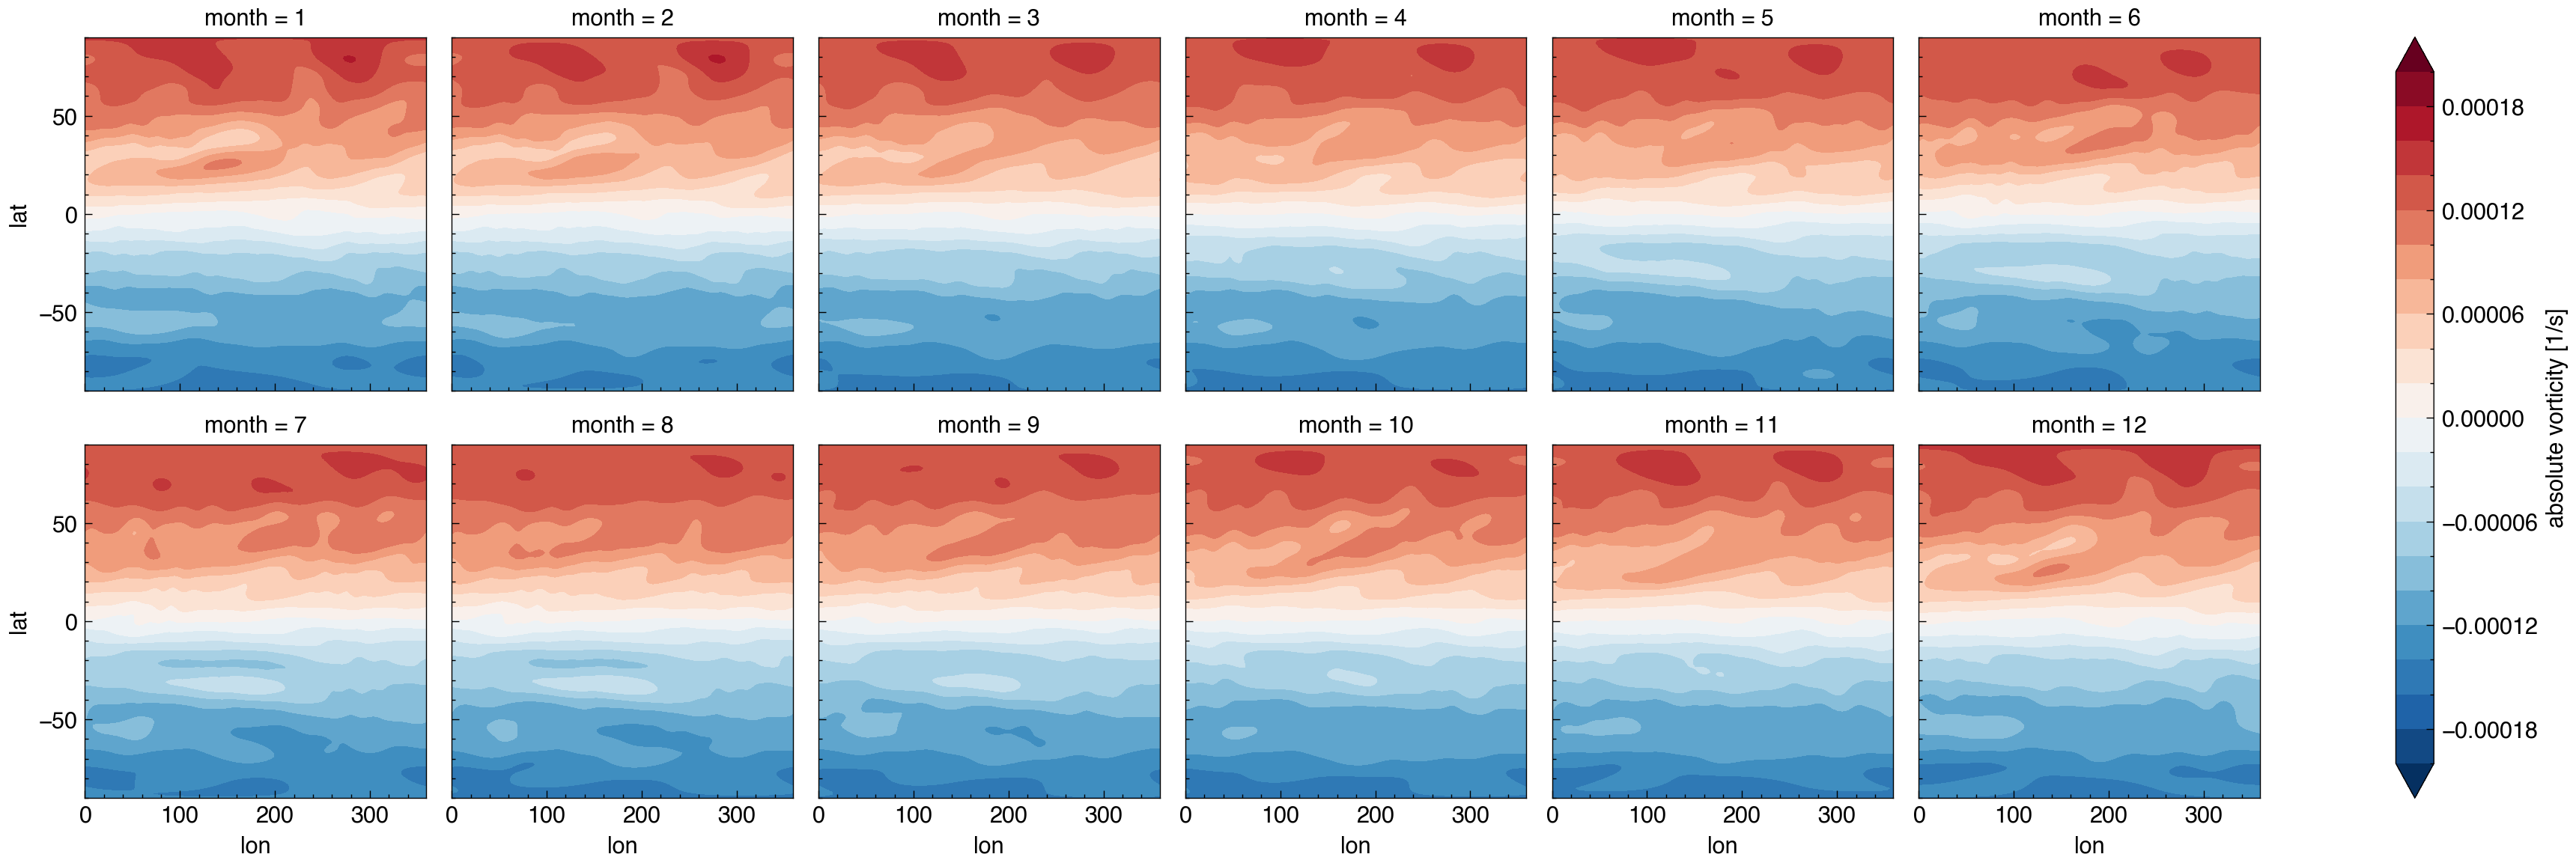

In [22]:
absvor = Xsp.uv2absvor(era_ds.u, era_ds.v, ntrunc=24)
cdict_vor = sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*2e-5, name='RdBu_r', extend='both', add_norm=False)

plt.figure(figsize=(12, 8))
absvor.plot.contourf(col='month', col_wrap=6, **cdict_vor)

<Figure size 1200x800 with 0 Axes>

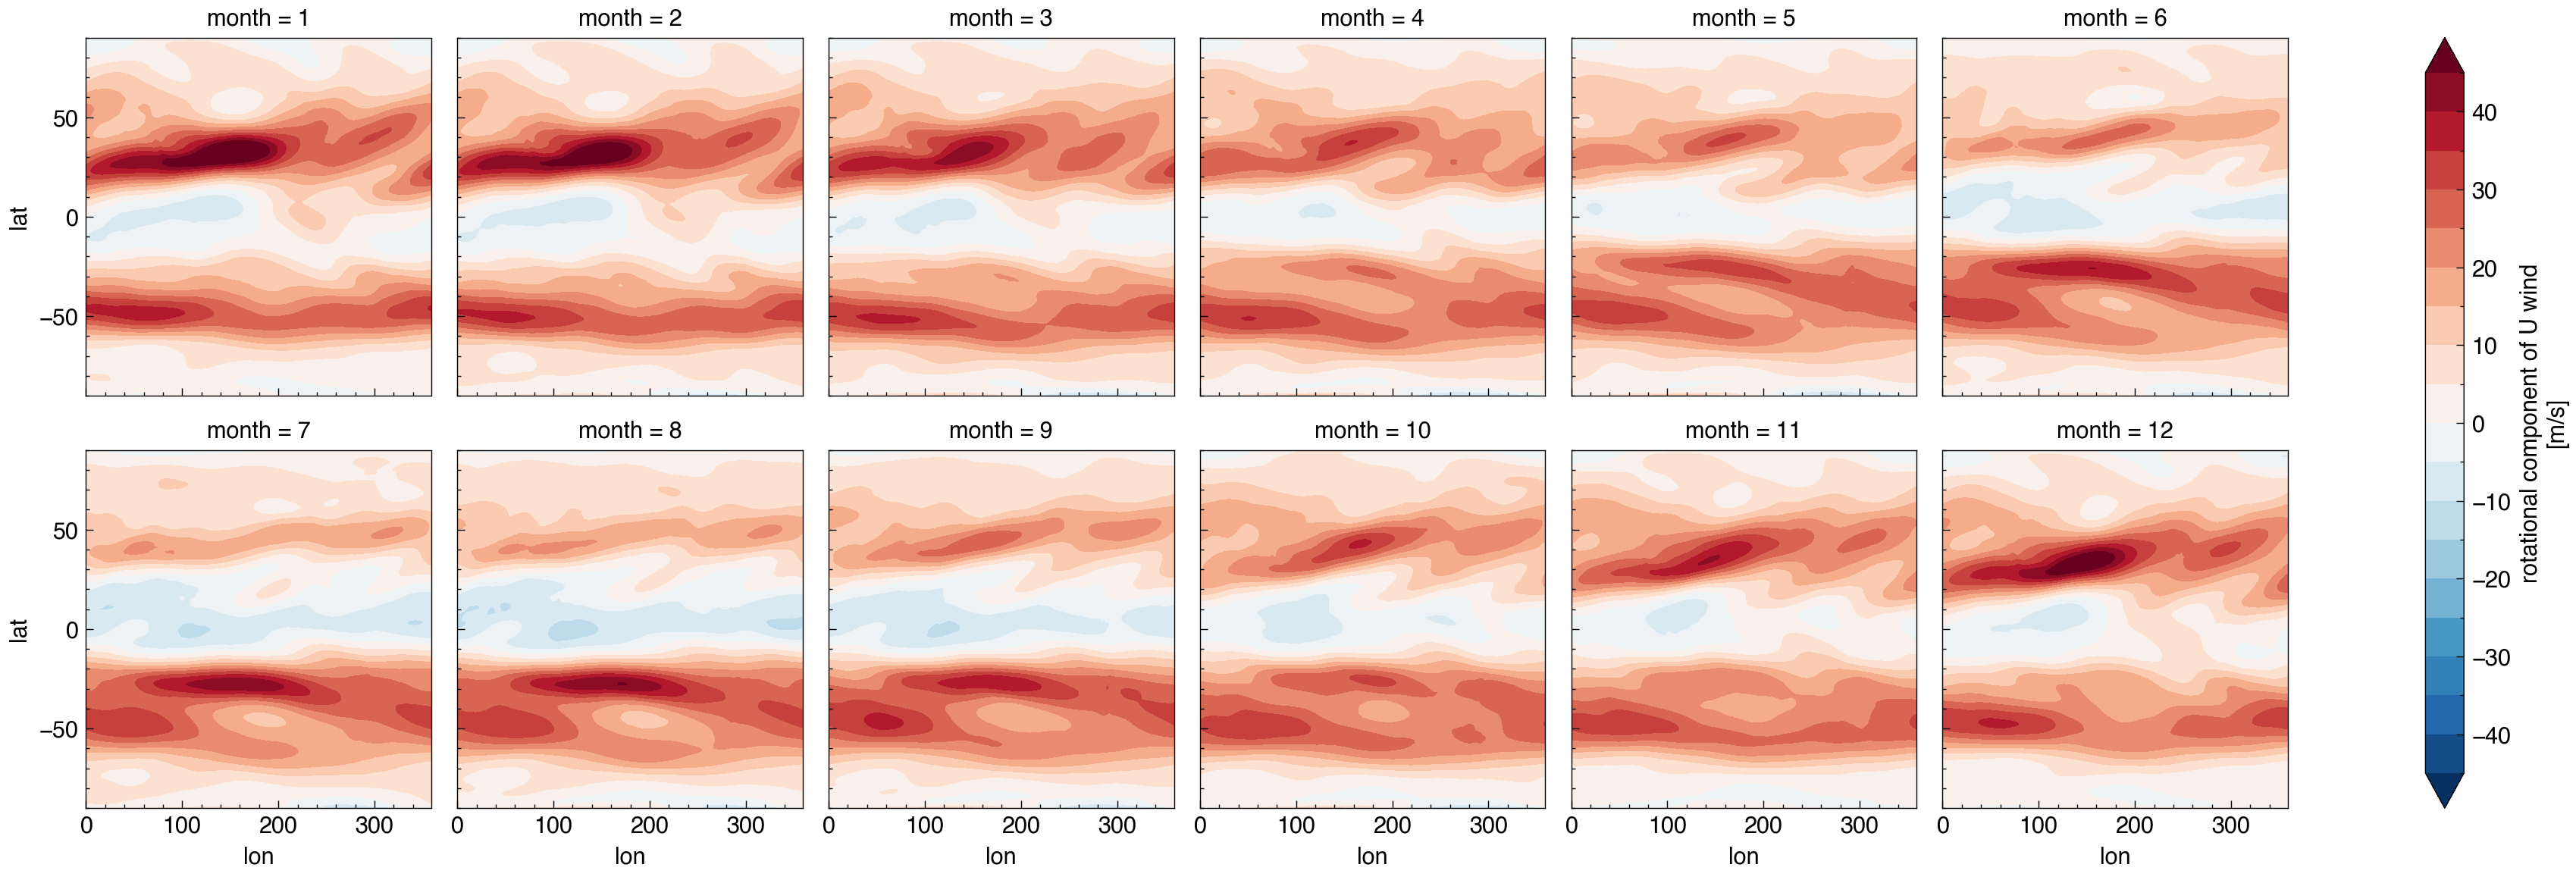

<Figure size 1200x800 with 0 Axes>

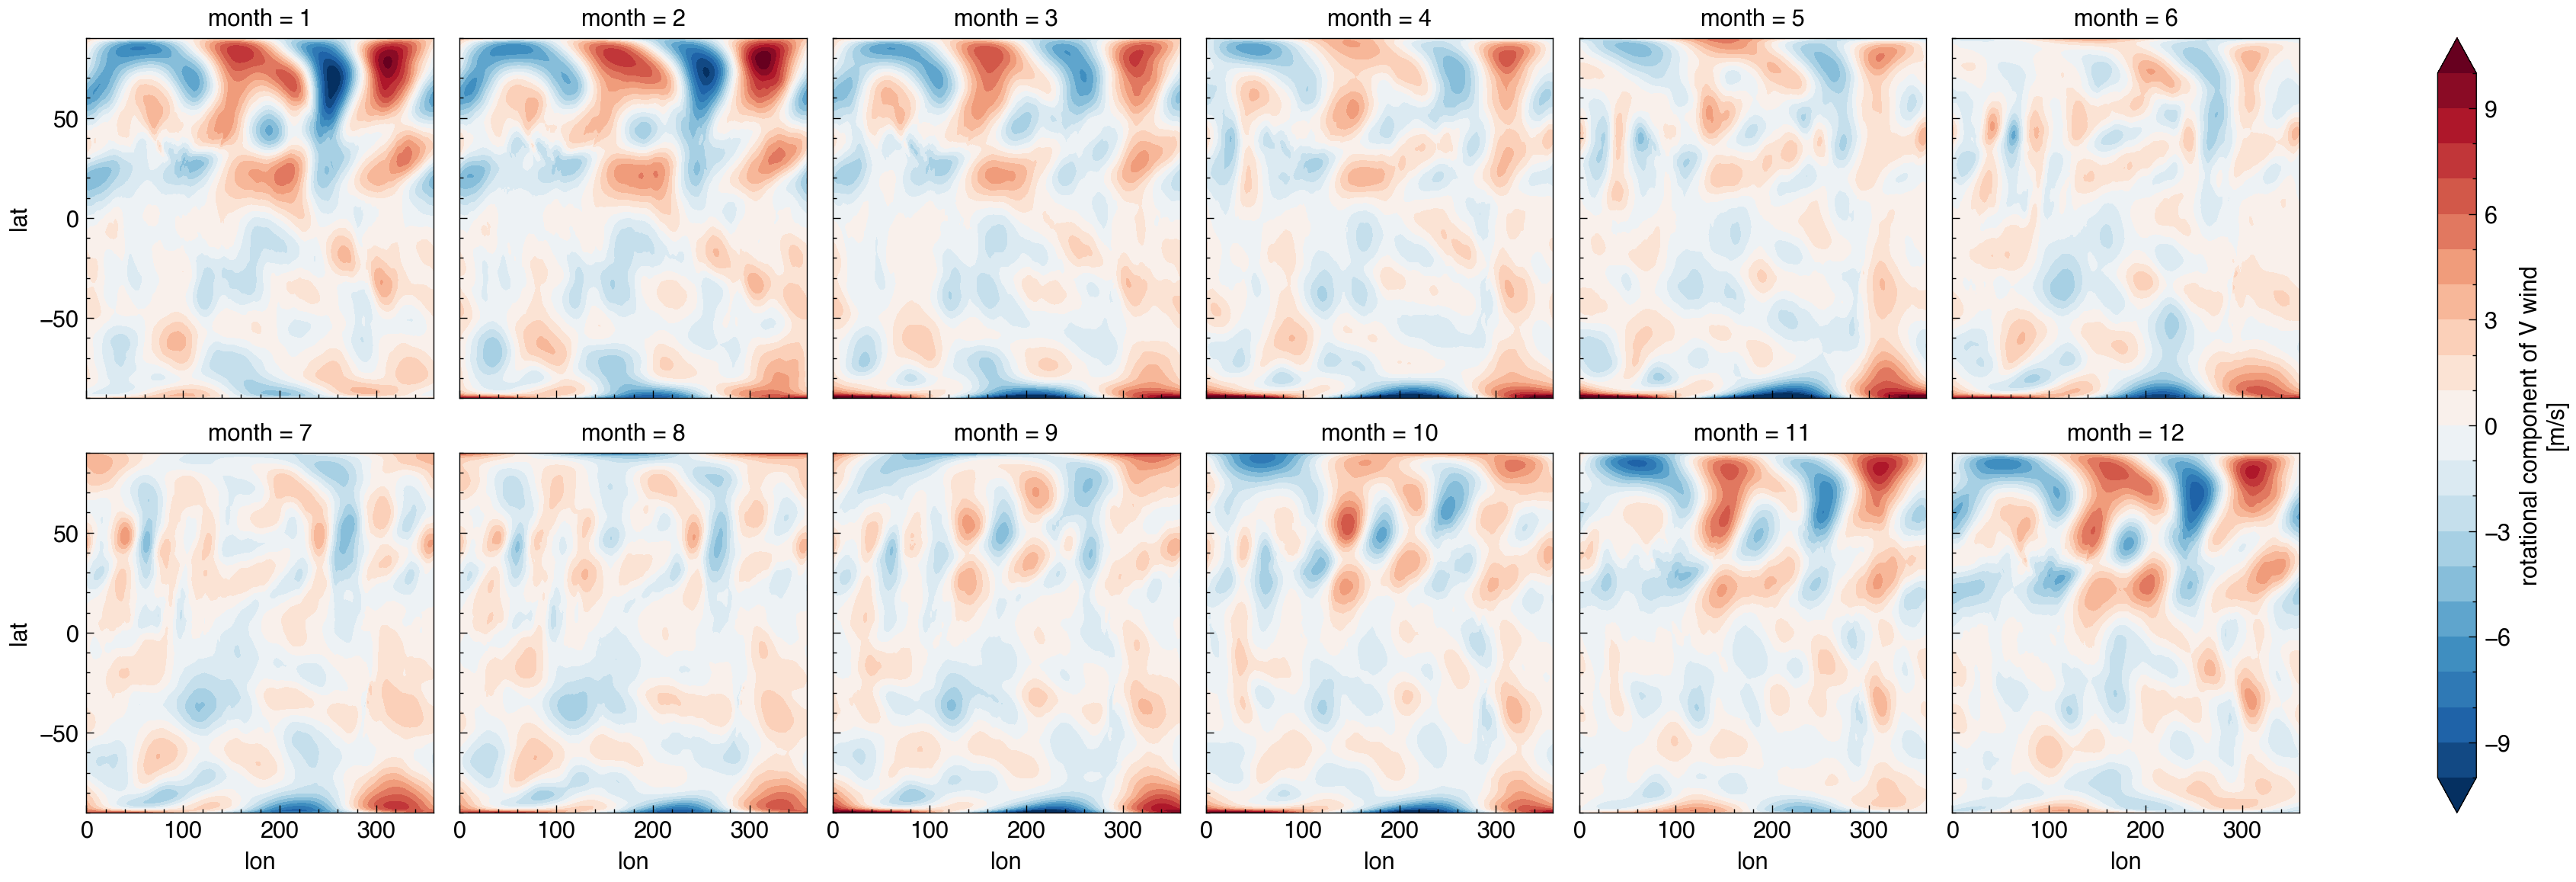

In [9]:
uv_rot_ds = Xsp.sf2uv(sfvp_ds['sf'])

plt.figure(figsize=(12, 8))
uv_rot_ds['u_rot'].plot.contourf(col='month', col_wrap=6, **cdict_u)

plt.figure(figsize=(12, 8))
uv_rot_ds['v_rot'].plot.contourf(col='month', col_wrap=6, **cdict_v)

<Figure size 1200x800 with 0 Axes>

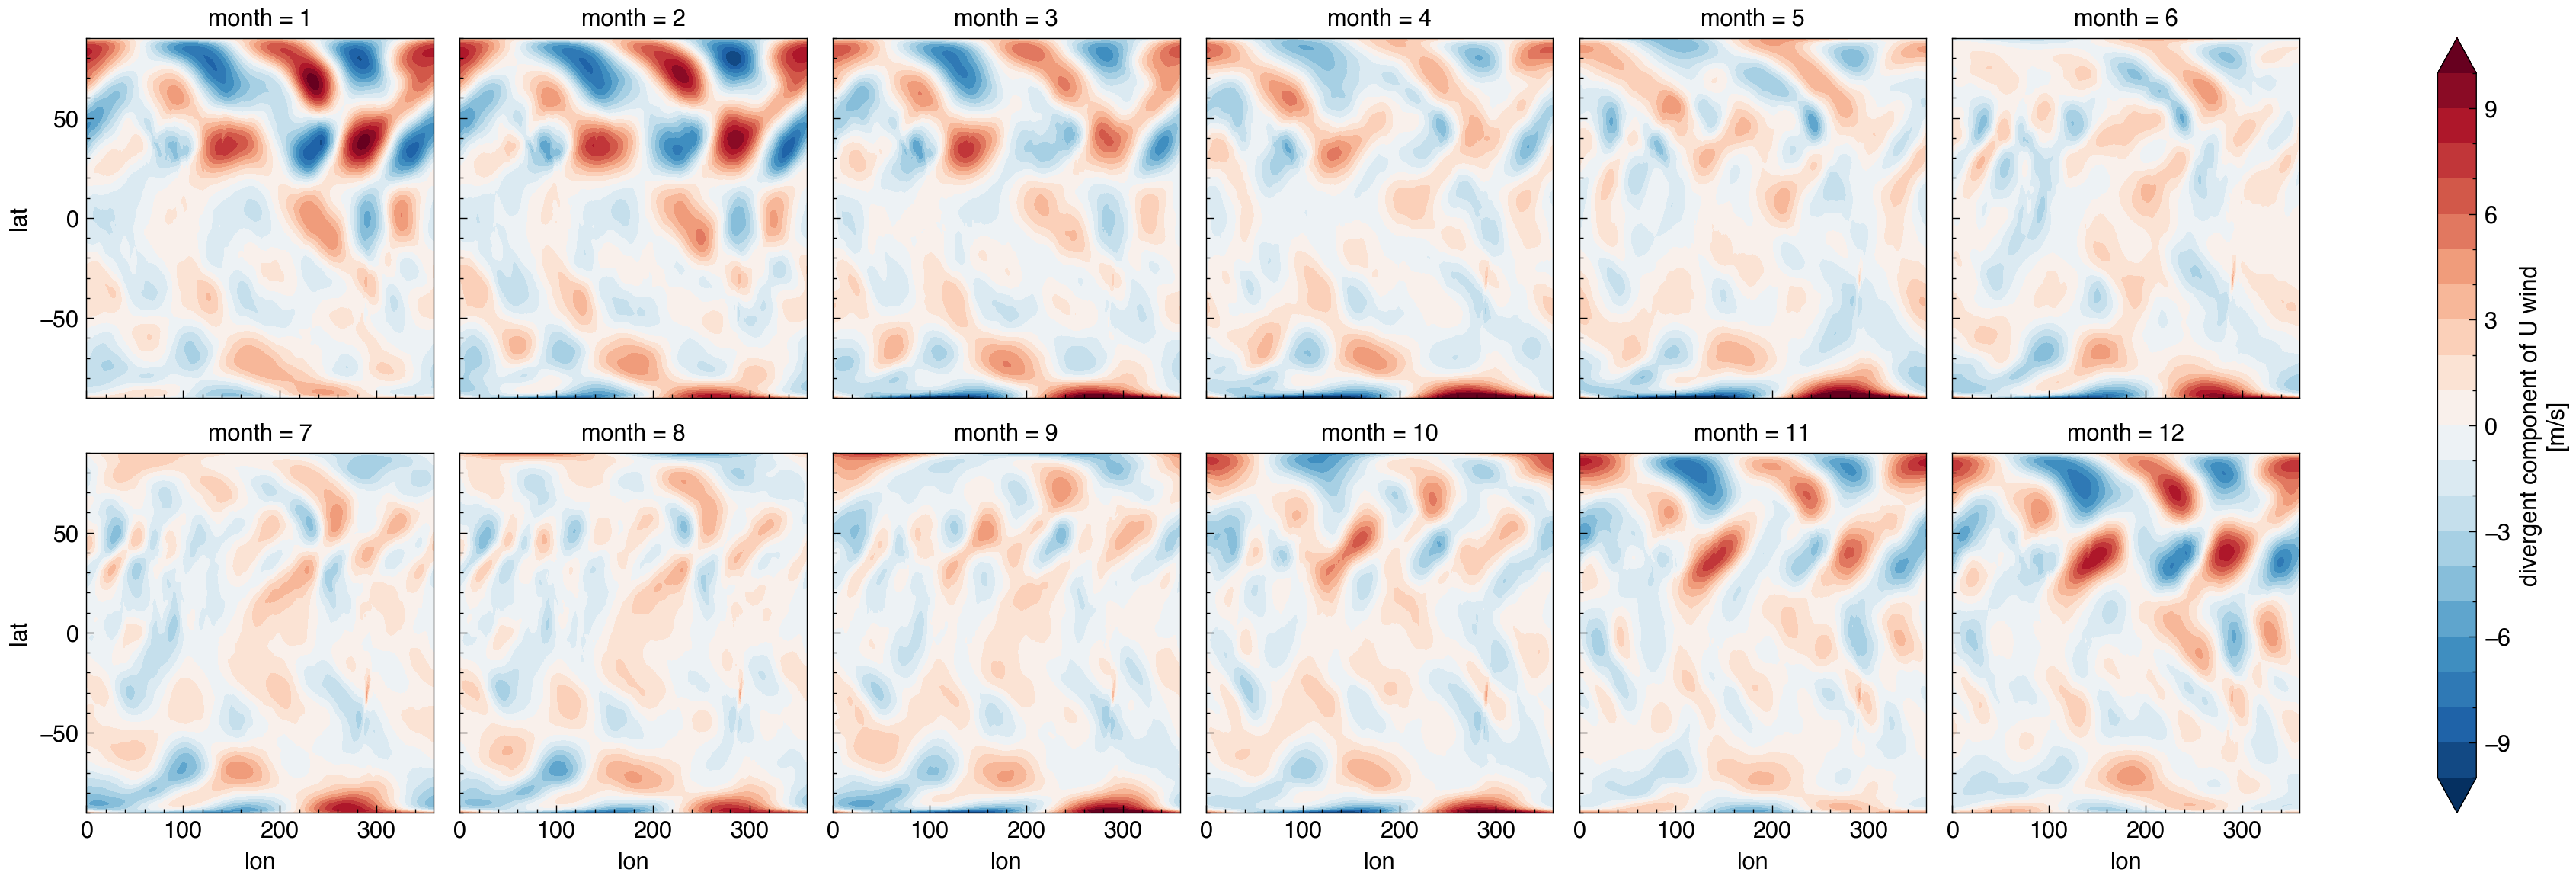

<Figure size 1200x800 with 0 Axes>

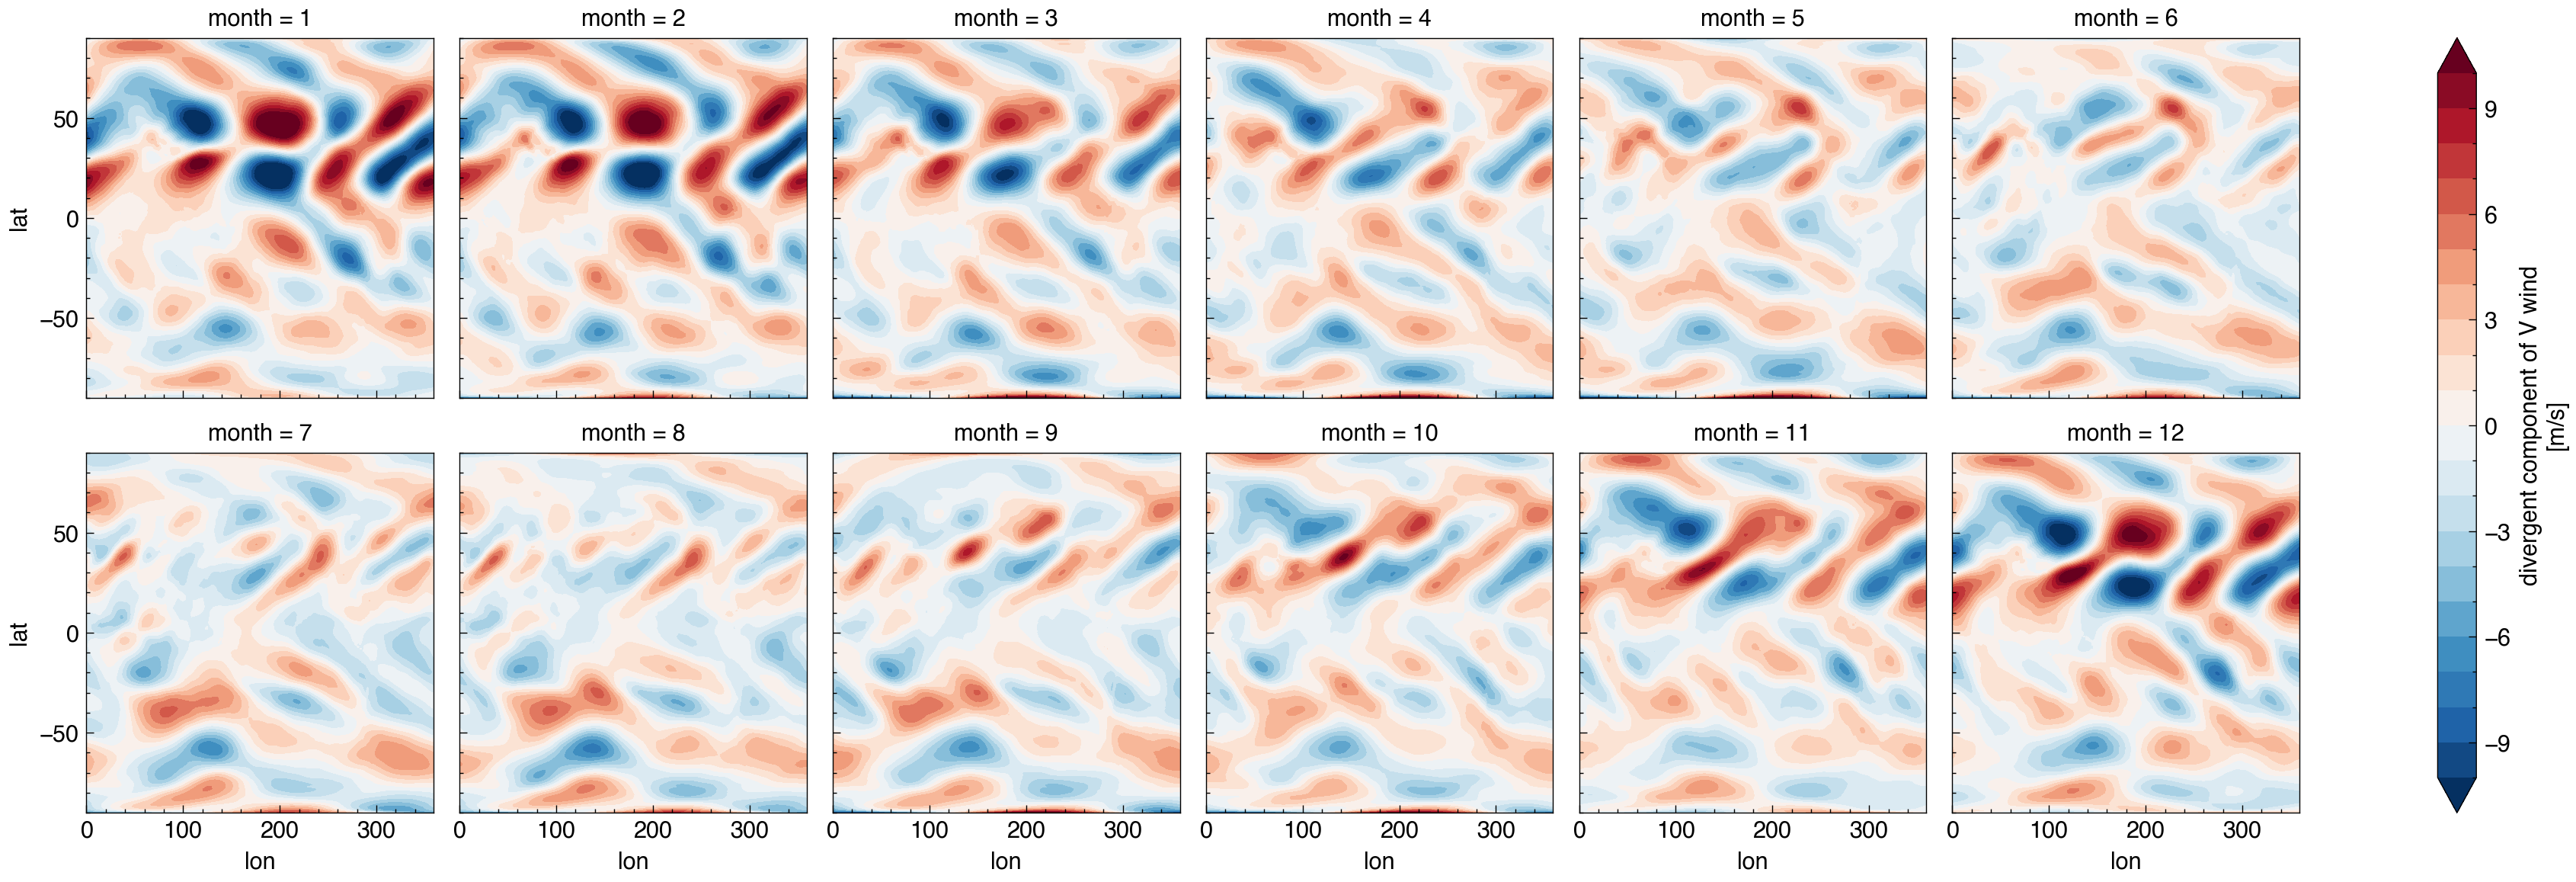

In [10]:
uv_div_ds = Xsp.vp2uv(sfvp_ds['vp'])
plt.figure(figsize=(12, 8))
uv_div_ds['u_div'].plot.contourf(col='month', col_wrap=6, **cdict_v)

plt.figure(figsize=(12, 8))
uv_div_ds['v_div'].plot.contourf(col='month', col_wrap=6, **cdict_v)

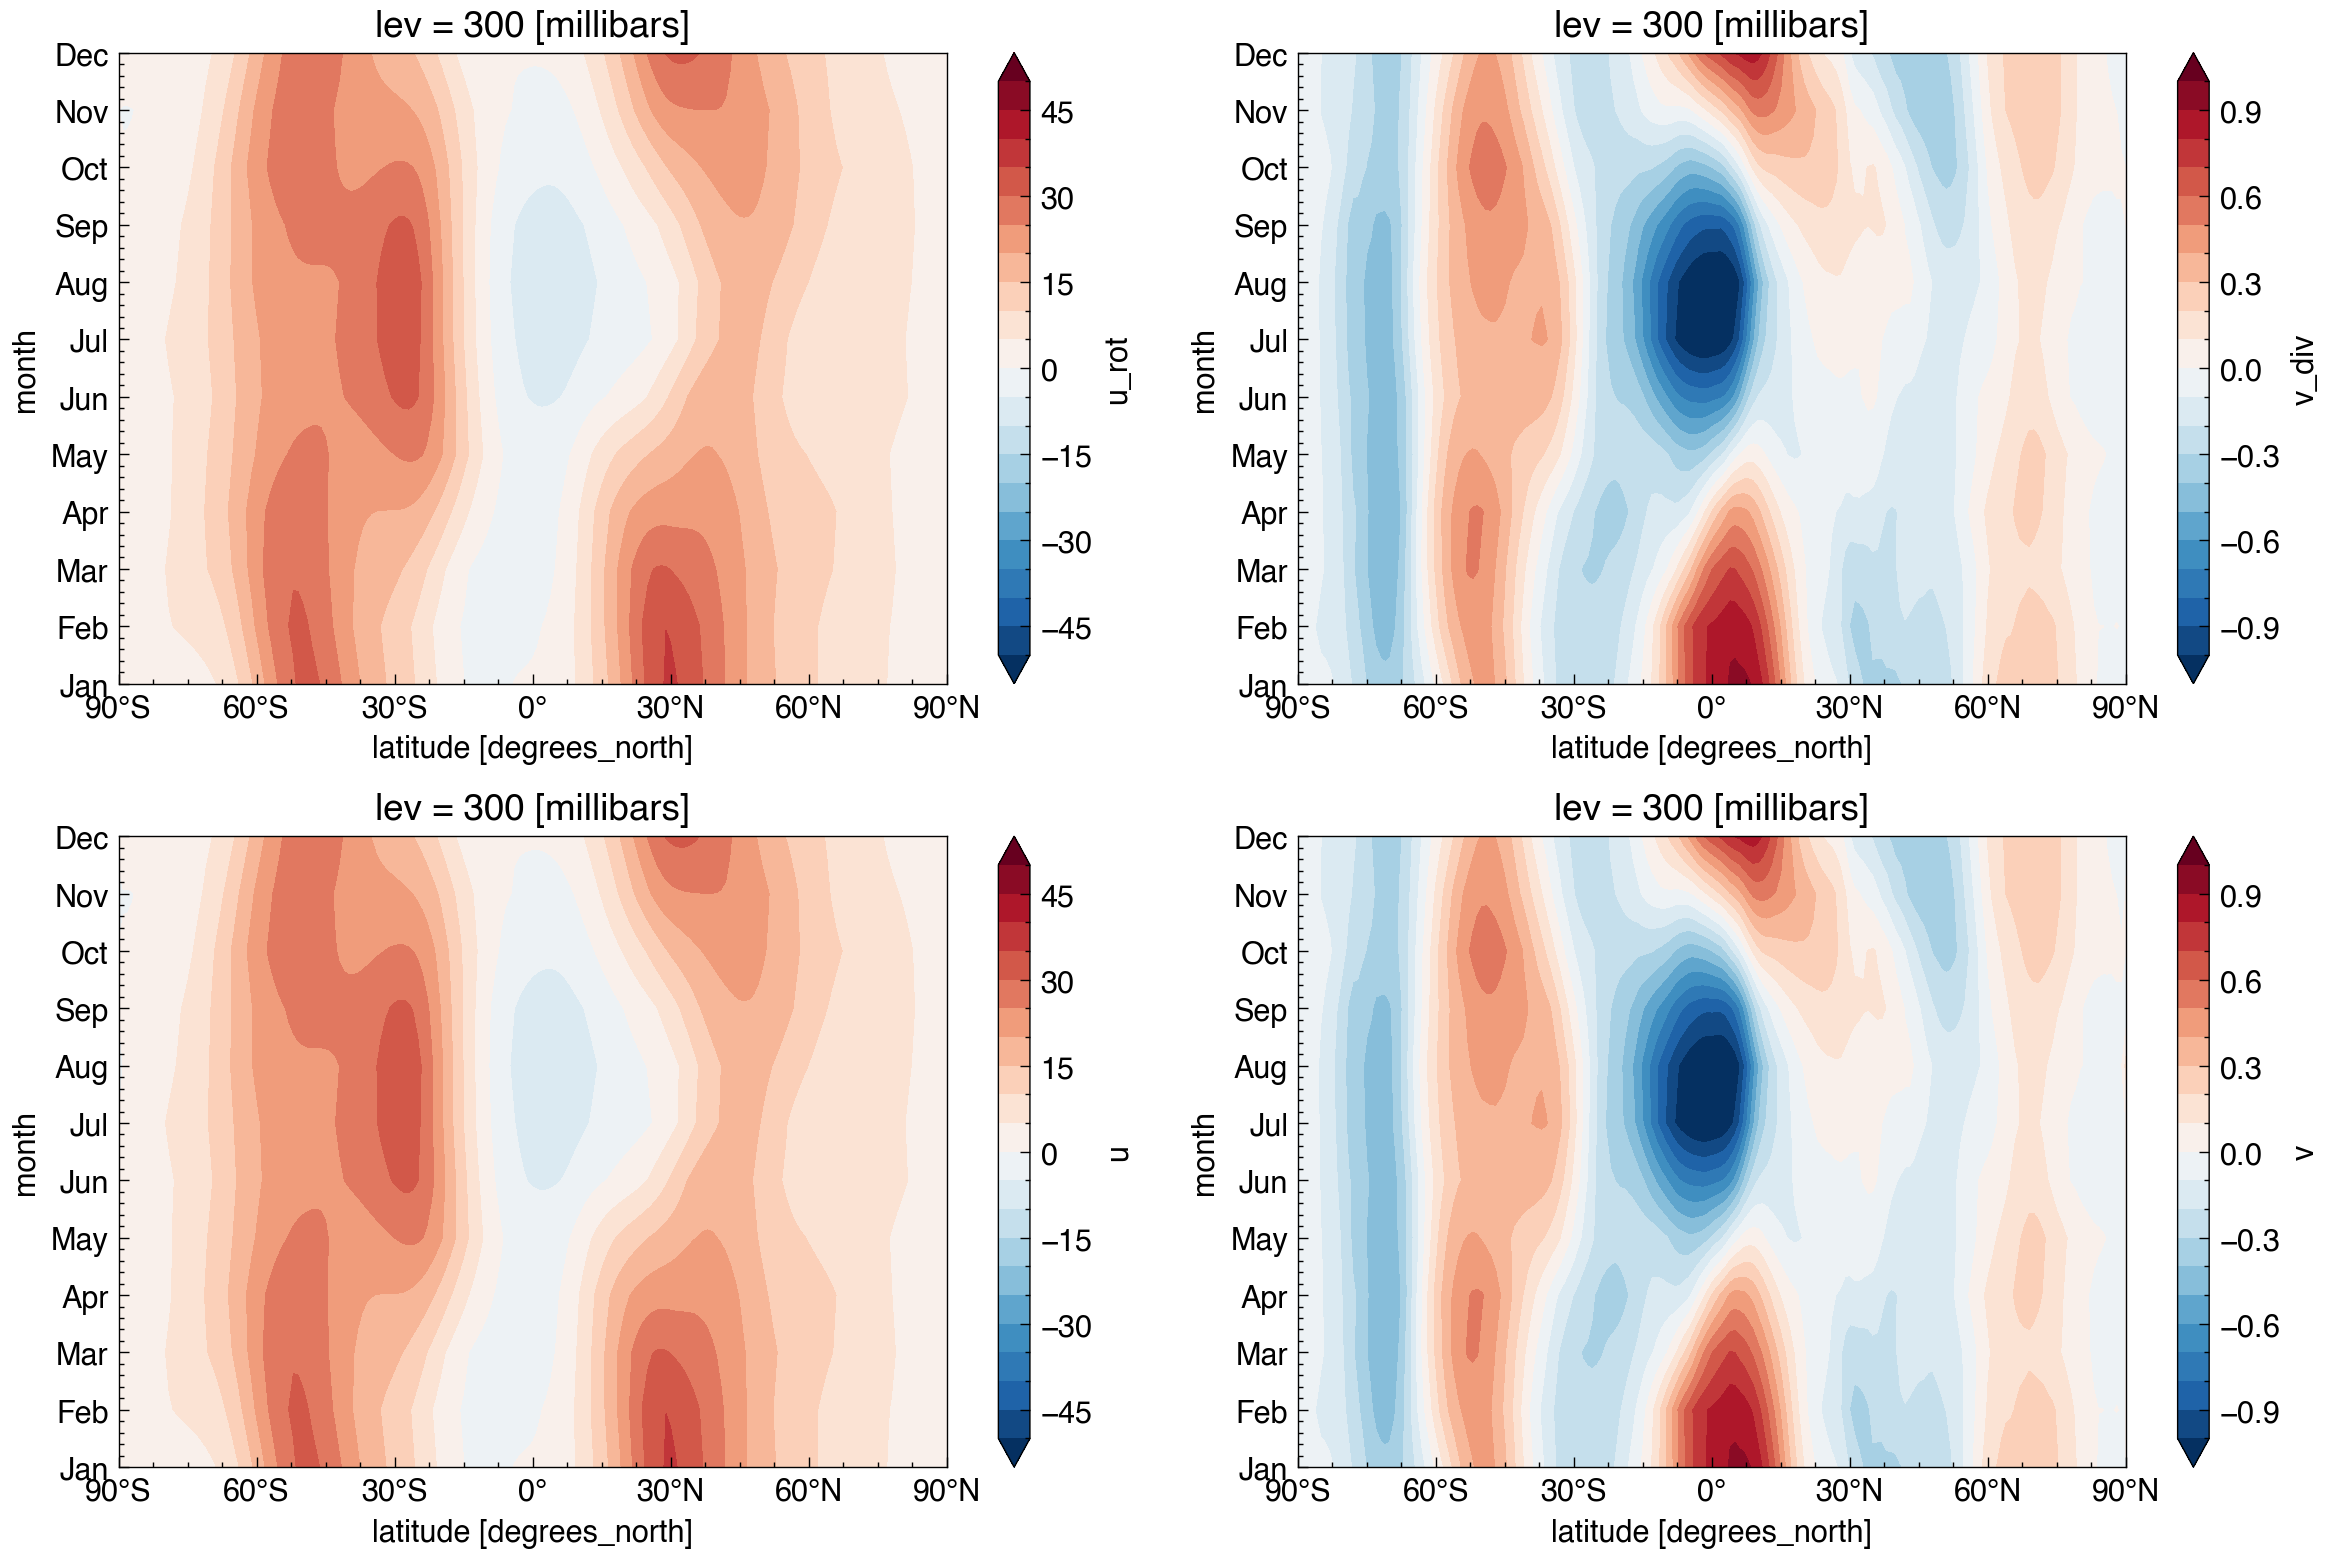

In [11]:

plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2, 2, 1)
uv_rot_ds['u_rot'].mean('lon').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*5, name='RdBu_r', extend='both', add_norm=False) )

ax2 = plt.subplot(2, 2, 2)
uv_div_ds['v_div'].mean('lon').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*0.1, name='RdBu_r', extend='both', add_norm=False) )

ax3 = plt.subplot(2, 2, 3)
era_ds['u'].mean('lon').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*5, name='RdBu_r', extend='both', add_norm=False) )

ax4 = plt.subplot(2, 2, 4)
era_ds['v'].mean('lon').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*0.1, name='RdBu_r', extend='both', add_norm=False) )


for ax in [ax1, ax2, ax3, ax4]:
    sp.set_latticks(ax, lats=np.arange(-90, 90.01, step=30), axis='x')
    sp.set_monticks(ax, axis='y', option='b')
    # ax.set_yticks(minor=False)
plt.tight_layout()

# plt.subplot(2, 2, 3)
# uv_rot_ds['u_rot'].sel(lat=slice(-5, 5)).mean('lat').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*1, name='RdBu_r', extend='both', add_norm=False) )

# plt.subplot(2, 2, 4)
# uv_div_ds['v_div'].sel(lat=slice(-5, 5)).mean('lat').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*0.1, name='RdBu_r', extend='both', add_norm=False) )



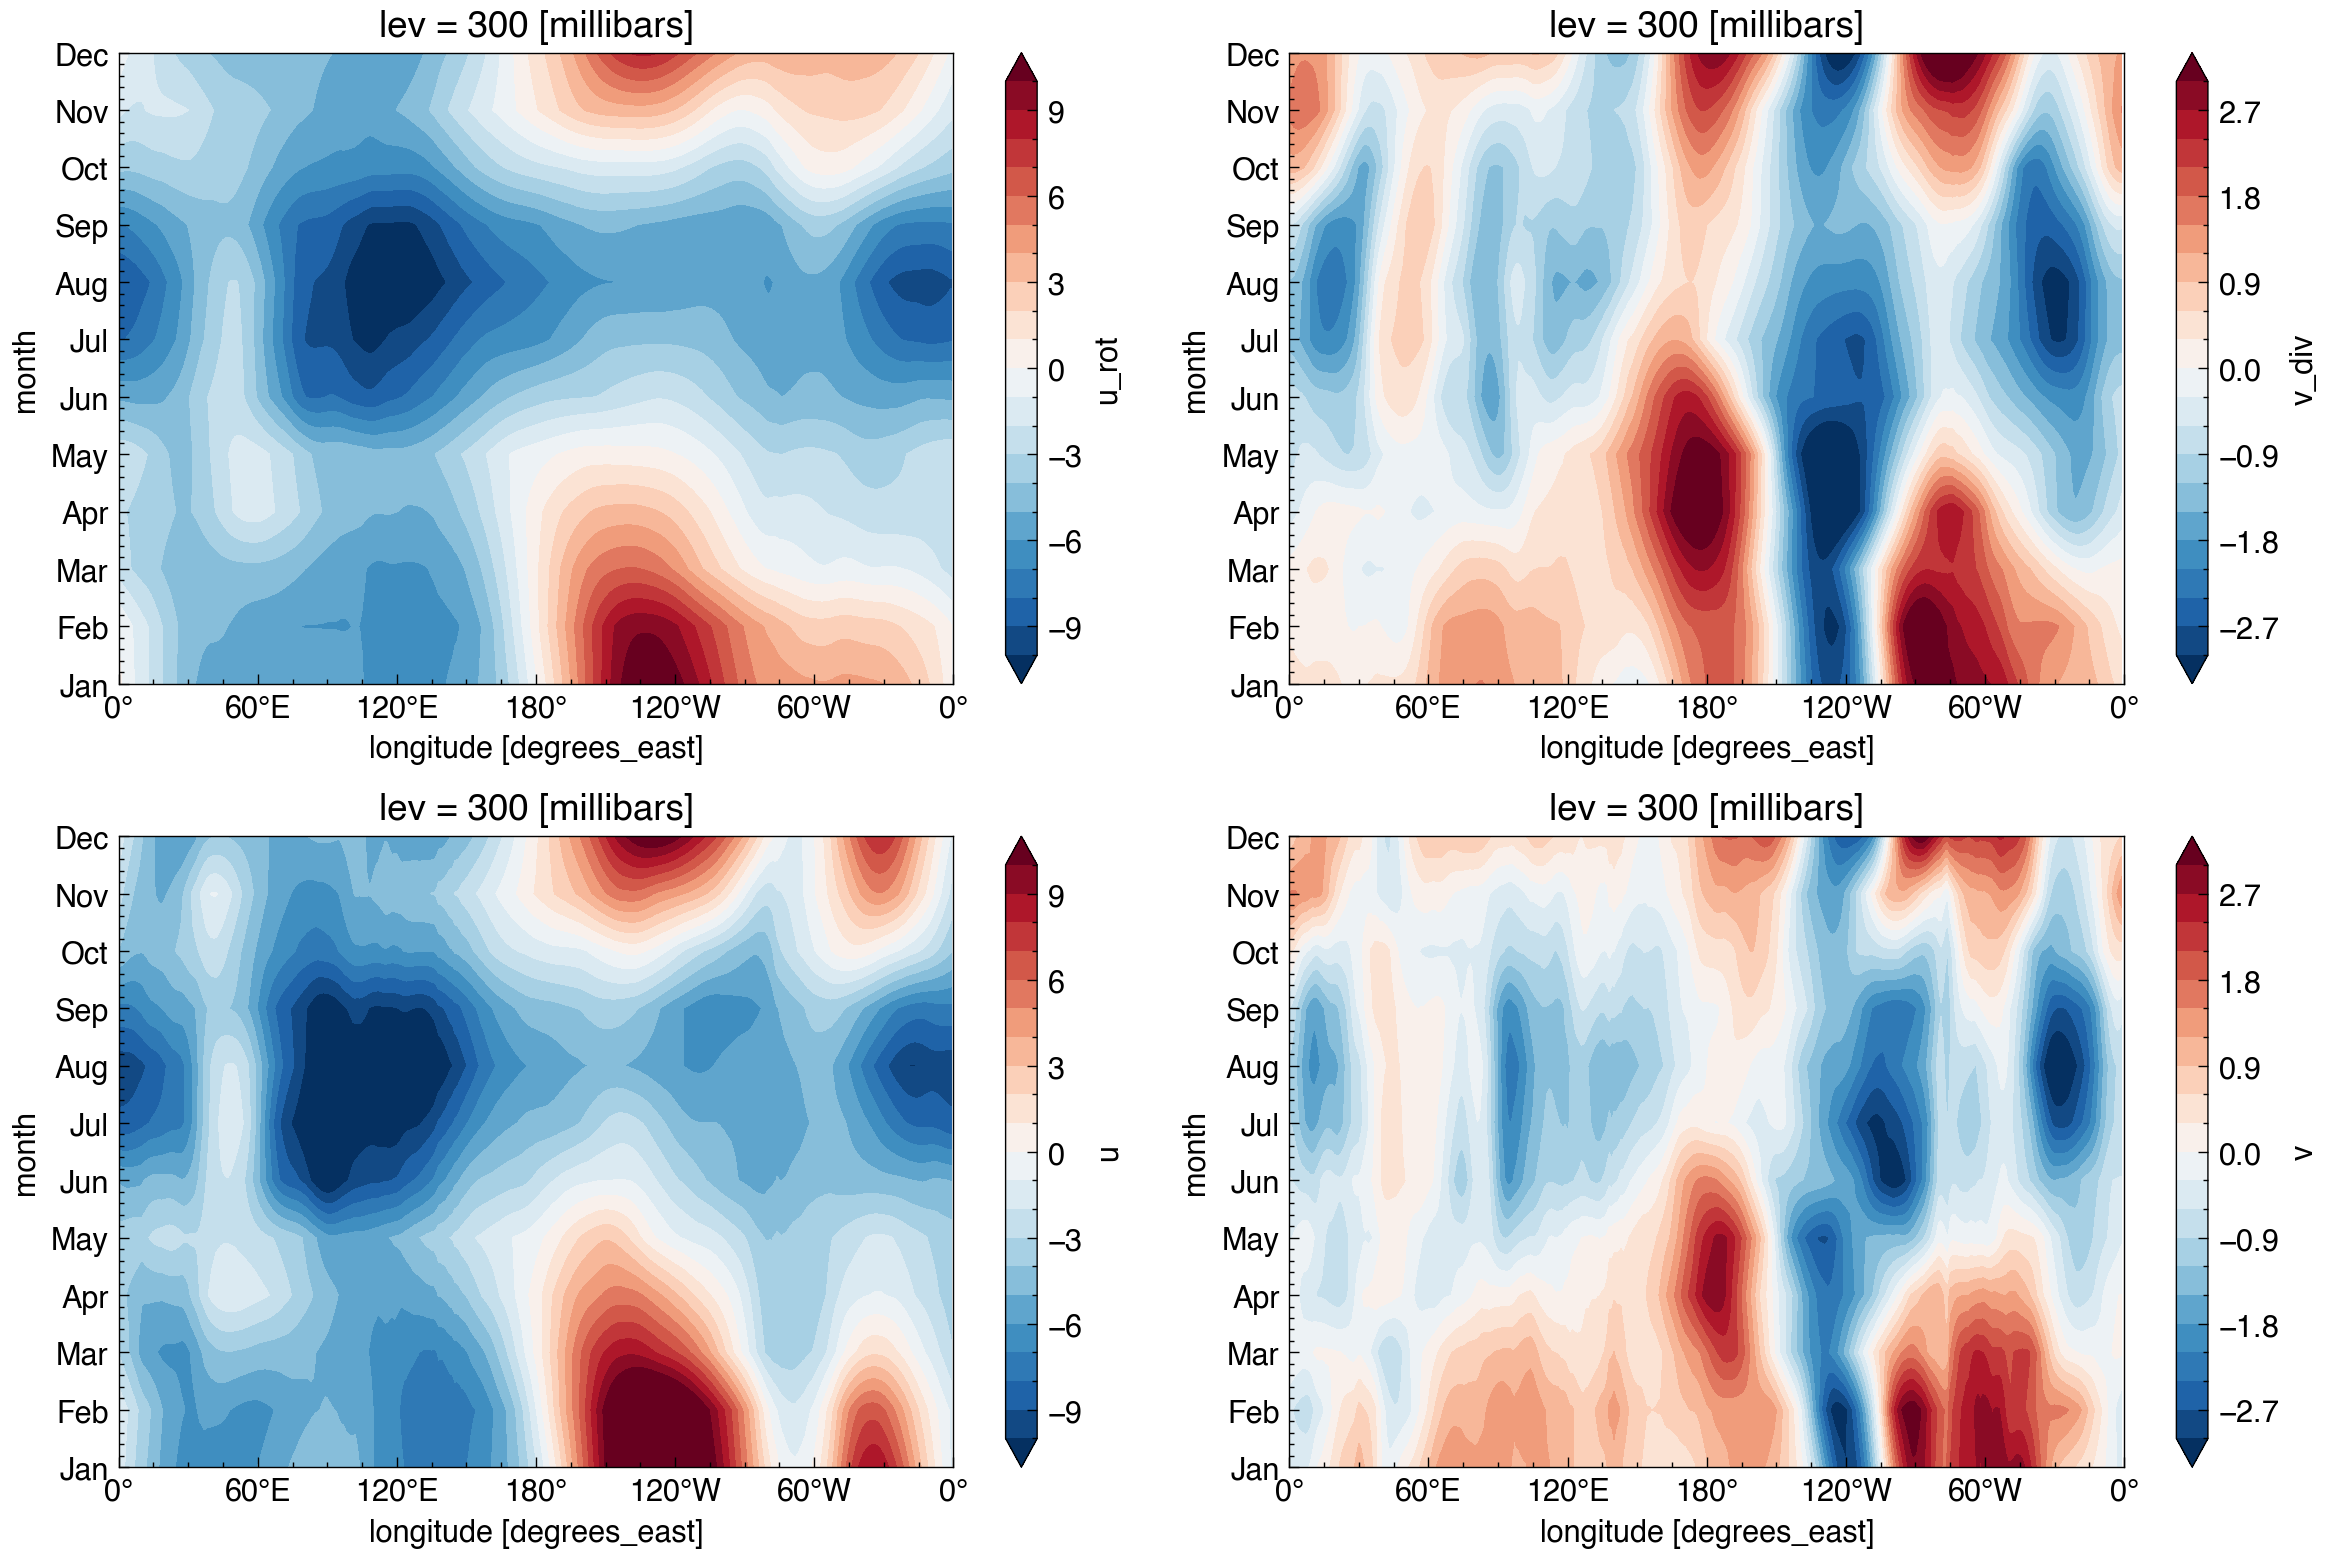

In [12]:
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2, 2, 1)
uv_rot_ds['u_rot'].sel(lat=slice(-5, 5)).mean('lat').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*1, name='RdBu_r', extend='both', add_norm=False) )

ax2 = plt.subplot(2, 2, 2)
uv_div_ds['v_div'].sel(lat=slice(-5, 5)).mean('lat').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*0.3, name='RdBu_r', extend='both', add_norm=False) )

ax3 = plt.subplot(2, 2, 3)
era_ds['u'].sel(lat=slice(-5, 5)).mean('lat').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*1, name='RdBu_r', extend='both', add_norm=False) )

ax4 = plt.subplot(2, 2, 4)
era_ds['v'].sel(lat=slice(-5, 5)).mean('lat').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*0.3, name='RdBu_r', extend='both', add_norm=False) )


for ax in [ax1, ax2, ax3, ax4]:
    sp.set_lonticks(ax, lons=np.arange(0, 360.01, step=60), axis='x')
    sp.set_monticks(ax, axis='y', option='b')
    # ax.set_yticks(minor=False)
plt.tight_layout()

# plt.subplot(2, 2, 3)
# uv_rot_ds['u_rot'].sel(lat=slice(-5, 5)).mean('lat').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*1, name='RdBu_r', extend='both', add_norm=False) )

# plt.subplot(2, 2, 4)
# uv_div_ds['v_div'].sel(lat=slice(-5, 5)).mean('lat').plot.contourf( **sp.cmap.dict_cmap_contourf(levels=np.arange(-10, 10.01, step=1)*0.1, name='RdBu_r', extend='both', add_norm=False) )



